# Instantiating an Embedding layer

In [1]:
from keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

# Loading the IMDB data for use with an Embedding layer

In [3]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 12s 1us/step


# Using an Embedding layer and classifier on the IMDB data

In [22]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten_4 (Flatten)         (None, 160)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6647 - acc: 0.6279 - val_loss: 0.6083 - val_acc: 0.7088
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5327 - acc: 0.7559 - val_loss: 0.5221 - val_acc: 0.7328
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4570 - acc: 0.7901 - val_loss: 0.4981 - val_acc: 0.7484
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4190 - acc: 0.8112 - val_loss: 0.4940 - val_acc: 0.7532
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3921 - acc: 0.8249 - val_loss: 0.4960 - val_acc: 0.7556
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3705 - acc: 0.8367 - val_loss: 0.4987 - val_acc: 0.7552
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3511 - acc: 0.8471 - val_loss: 0.5030 - val_acc: 0.7546
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

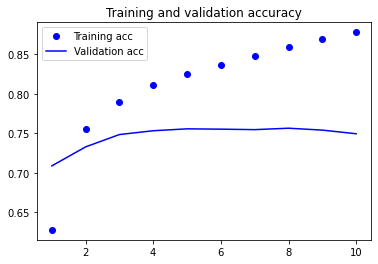

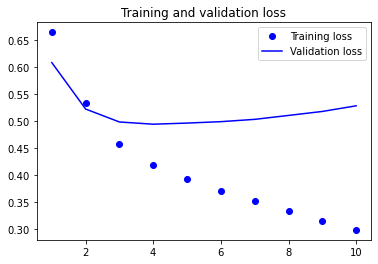

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()